## Dataset

* Source: https://www.kaggle.com/datasets/tanishqdublish/text-classification-documentation
* License: [Licence Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0)

This is text document classification dataset which contains 2225 text data and five categories of documents. Five categories are politics, sport, tech, entertainment and business. We can use this dataset for documents classification and document clustering.

Dataset contains two features text and label.
* No. of Rows : 2225
* No. of Columns : 2

Columns: 
* Text: It contains different categories of text data
* Label: It contains labels for five different categories : 0,1,2,3,4

Where: 
* Politics = 0
* Sport = 1
* Technology = 2
* Entertainment =3
* Business = 4

In [2]:
import pandas as pd
df = pd.read_csv('classification_model_used_df_file.csv')

In [6]:
from haystack.components.routers import TransformersZeroShotTextRouter

text_router = TransformersZeroShotTextRouter(
    model="MoritzLaurer/deberta-v3-large-zeroshot-v2.0",
    labels=["Politics", "Sport","Technology","Entertainment", "Business"],)
text_router.warm_up()

In [9]:
map_categories = {0: 'Politics', 1: 'Sport', 2: 'Technology', 3: 'Entertainment', 4: 'Business'}
df['category_label'] = df['Label'].apply(lambda x: map_categories[x])


In [10]:
df.head()

,Text,Label,category_label
0,Budget to set scene for election\n \n Gordon B...,0,Politics
1,Army chiefs in regiments decision\n \n Militar...,0,Politics
2,Howard denies split over ID cards\n \n Michael...,0,Politics
3,Observers to monitor UK election\n \n Minister...,0,Politics
4,Kilroy names election seat target\n \n Ex-chat...,0,Politics


In [13]:
def process_text(query):
    result = text_router.run(text=query)
    return next(iter(result))

df['Output Branch'] = df['Text'].apply(lambda text: process_text(text))


In [14]:
df.to_csv('classification_model_used_df_file.csv', index=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Text            2225 non-null   object
 1   Label           2225 non-null   int64 
 2   category_label  2225 non-null   object
 3   Output Branch   2225 non-null   object
dtypes: int64(1), object(3)
memory usage: 69.7+ KB


### Computing accuracy

In [4]:
accuracy = (df['category_label'] == df['Output Branch']).mean()
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.33%


### Confusion matrix

Confusion Matrix:


<Figure size 600x600 with 0 Axes>

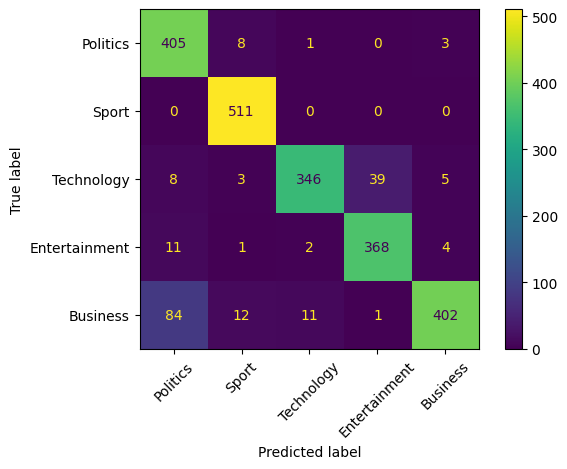

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Convert category labels and Output Branch to numerical values for confusion matrix
# Assuming you already have a mapping for labels
label_map = {
    "Politics": 0,
    "Sport": 1,
    "Technology": 2,
    "Entertainment": 3,
    "Business": 4
}

inverse_map = {v: k for k, v in label_map.items()}

df['category_numeric'] = df['category_label'].map(label_map)
df['output_numeric'] = df['Output Branch'].map(label_map)

cm = confusion_matrix(df['category_numeric'], df['output_numeric'])
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=inverse_map.values())
plt.figure(figsize=(6, 6)) 
disp.plot()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('confusion_matrix.png')

### Evaluating model performance

In [18]:
df['exact_match'] = df['category_label'] == df['Output Branch']

In [21]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(df['category_numeric'], df['output_numeric'], target_names=label_map.keys())
print("Classification Report:")
print(report)

Classification Report:
               precision    recall  f1-score   support

     Politics       0.80      0.97      0.88       417
        Sport       0.96      1.00      0.98       511
   Technology       0.96      0.86      0.91       401
Entertainment       0.90      0.95      0.93       386
     Business       0.97      0.79      0.87       510

     accuracy                           0.91      2225
    macro avg       0.92      0.92      0.91      2225
 weighted avg       0.92      0.91      0.91      2225



The model performs very well overall, with an accuracy of 91%.
* Sport is the best-performing class, with 1.00 recall (i.e., it identifies every instance of 'Sport') and a high F1-score of 0.98.
* Business has a slightly lower recall of 0.79, meaning that it misses about 21% of the 'Business' instances, but its precision is still very high at 0.97, indicating that the instances it predicts as 'Business' are mostly correct.
* The model has a good balance of precision and recall across all categories, as reflected by the relatively high F1-scores.

### Conclusion:
This classification model has performed well, especially in categories like Sport, Technology, and Entertainment, with a very high recall and precision. However, Business has slightly lower recall, meaning it might benefit from more focused tuning or additional data for that category.